# Рубежный контроль №2

## Лобанов В.С. ИУ5-62Б

## Вариант №15

**Задание:** Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д

**Методы для ИУ5-62Б.** Метод №1: "Метод опорных векторов". Метод №2: "Случайный лес".

**Набор данных:** [U.S. Education Datasets: Unification Project](https://www.kaggle.com/noriuk/us-education-datasets-unification-project)

## Импорт библиотек

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## Загрузка и первичная обработка набора данных

In [10]:
# загрузка набора данных
data=pd.read_csv('states_all_extended.csv', sep=",")
# размер набора данных
data.shape

(1715, 266)

In [11]:
# первые 5 строк набора данных
data.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,G08_HI_A_READING,G08_HI_A_MATHEMATICS,G08_AS_A_READING,G08_AS_A_MATHEMATICS,G08_AM_A_READING,G08_AM_A_MATHEMATICS,G08_HP_A_READING,G08_HP_A_MATHEMATICS,G08_TR_A_READING,G08_TR_A_MATHEMATICS
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
parts = np.split(data, [13], axis=1)
data = parts[0]

In [23]:
# список колонок с типами данных
data.dtypes

STATE                            int32
YEAR                            object
TOTAL_REVENUE                   object
FEDERAL_REVENUE                 object
STATE_REVENUE                   object
LOCAL_REVENUE                   object
TOTAL_EXPENDITURE               object
INSTRUCTION_EXPENDITURE         object
SUPPORT_SERVICES_EXPENDITURE    object
OTHER_EXPENDITURE               object
CAPITAL_OUTLAY_EXPENDITURE      object
dtype: object

In [14]:
data.drop(['ENROLL','PRIMARY_KEY'], axis = 1, inplace = True)

## Обработка пропусков данных

In [15]:
le = LabelEncoder()
le.fit(data.STATE.drop_duplicates()) 
data.STATE = le.transform(data.STATE)

In [16]:
# Удаление строк, содержащих пустые значения
data_new = data.dropna(axis=0, how='any')
(data.shape, data_new.shape)

((1715, 11), (1224, 11))

In [17]:
data=data_new

In [18]:
data.isnull().sum()

STATE                           0
YEAR                            0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
dtype: int64

In [19]:
data.head()

,STATE,YEAR,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
51,0,1993,2827391.0,331409.0,1729295.0,766687.0,2833433.0,1564558.0,794146.0,237222.0,204207.0
52,1,1993,1191398.0,176150.0,775829.0,239419.0,1126398.0,494917.0,433788.0,36291.0,135791.0
53,2,1993,3427976.0,318465.0,1415407.0,1694104.0,3623946.0,1578889.0,1000914.0,164083.0,680139.0
54,3,1993,1346909.0,128196.0,771079.0,447634.0,1376067.0,782791.0,386526.0,68617.0,97824.0
55,4,1993,28043338.0,2151157.0,17064146.0,8828035.0,28110986.0,15281147.0,8914559.0,1608514.0,1944760.0


## Масштабирование данных:
### MinMax масштабирование

In [20]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [25]:
# колонки для масштабирования
scale_cols = ['STATE','YEAR','TOTAL_REVENUE','FEDERAL_REVENUE',	'STATE_REVENUE','LOCAL_REVENUE','TOTAL_EXPENDITURE','INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE','OTHER_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE']

In [26]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[scale_cols])

In [27]:
# Добавим масштабированные данные в набор данных
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    data[new_col_name] = sc1_data[:,i]

In [28]:
data.head()

,STATE,YEAR,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,YEAR_scaled,TOTAL_REVENUE_scaled,FEDERAL_REVENUE_scaled,STATE_REVENUE_scaled,LOCAL_REVENUE_scaled,TOTAL_EXPENDITURE_scaled,INSTRUCTION_EXPENDITURE_scaled,SUPPORT_SERVICES_EXPENDITURE_scaled,OTHER_EXPENDITURE_scaled,CAPITAL_OUTLAY_EXPENDITURE_scaled
51,0,1993,2827391.0,331409.0,1729295.0,766687.0,2833433.0,1564558.0,794146.0,237222.0,...,0.0,0.026611,0.029904,0.033971,0.020586,0.027721,0.029726,0.025240,0.056641,0.018754
52,1,1993,1191398.0,176150.0,775829.0,239419.0,1126398.0,494917.0,433788.0,36291.0,...,0.0,0.008177,0.014310,0.015241,0.005973,0.007600,0.005249,0.011337,0.006212,0.012054
53,2,1993,3427976.0,318465.0,1415407.0,1694104.0,3623946.0,1578889.0,1000914.0,164083.0,...,0.0,0.033378,0.028604,0.027805,0.046289,0.037038,0.030054,0.033218,0.038285,0.065364
54,3,1993,1346909.0,128196.0,771079.0,447634.0,1376067.0,782791.0,386526.0,68617.0,...,0.0,0.009929,0.009494,0.015148,0.011743,0.010542,0.011836,0.009513,0.014325,0.008336
55,4,1993,28043338.0,2151157.0,17064146.0,8828035.0,28110986.0,15281147.0,8914559.0,1608514.0,...,0.0,0.310729,0.212673,0.335218,0.244007,0.325670,0.343614,0.338551,0.400805,0.189214


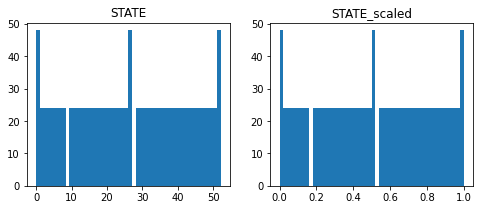

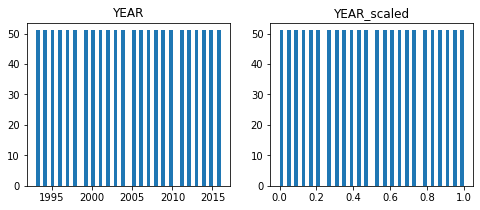

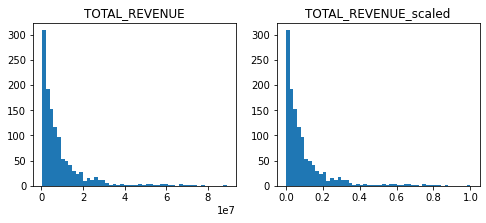

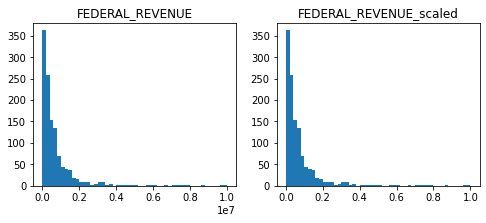

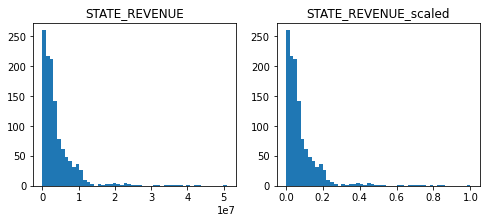

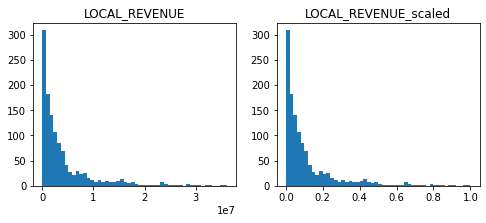

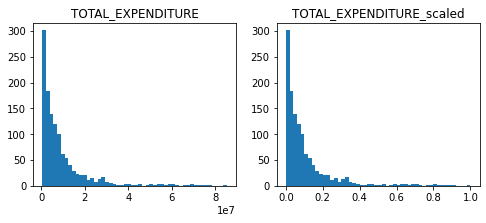

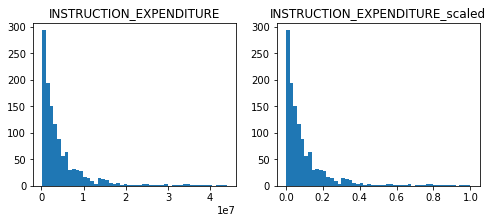

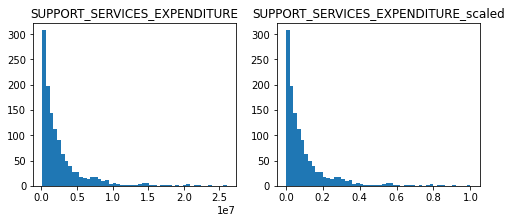

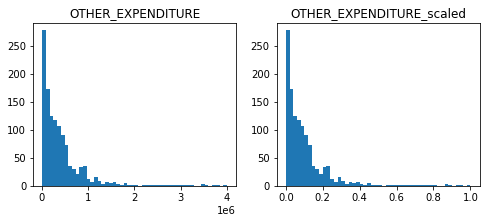

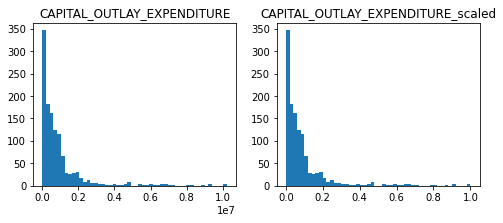

In [29]:
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(data[col], 50)
    ax[1].hist(data[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

In [30]:
data.drop(['TOTAL_REVENUE','FEDERAL_REVENUE','STATE_REVENUE','LOCAL_REVENUE','TOTAL_EXPENDITURE','INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE','OTHER_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE'], axis = 1, inplace = True)

In [31]:
data.head()

,STATE,YEAR,STATE_scaled,YEAR_scaled,TOTAL_REVENUE_scaled,FEDERAL_REVENUE_scaled,STATE_REVENUE_scaled,LOCAL_REVENUE_scaled,TOTAL_EXPENDITURE_scaled,INSTRUCTION_EXPENDITURE_scaled,SUPPORT_SERVICES_EXPENDITURE_scaled,OTHER_EXPENDITURE_scaled,CAPITAL_OUTLAY_EXPENDITURE_scaled
51,0,1993,0.000000,0.0,0.026611,0.029904,0.033971,0.020586,0.027721,0.029726,0.025240,0.056641,0.018754
52,1,1993,0.019231,0.0,0.008177,0.014310,0.015241,0.005973,0.007600,0.005249,0.011337,0.006212,0.012054
53,2,1993,0.038462,0.0,0.033378,0.028604,0.027805,0.046289,0.037038,0.030054,0.033218,0.038285,0.065364
54,3,1993,0.057692,0.0,0.009929,0.009494,0.015148,0.011743,0.010542,0.011836,0.009513,0.014325,0.008336
55,4,1993,0.076923,0.0,0.310729,0.212673,0.335218,0.244007,0.325670,0.343614,0.338551,0.400805,0.189214


## Построение моделей:

In [32]:
X = data.drop(['TOTAL_EXPENDITURE_scaled'], axis = 1)
Y = data.TOTAL_EXPENDITURE_scaled
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

    STATE  YEAR  STATE_scaled  YEAR_scaled  TOTAL_REVENUE_scaled  \
51     0  1993      0.000000          0.0              0.026611   
52     1  1993      0.019231          0.0              0.008177   
53     2  1993      0.038462          0.0              0.033378   
54     3  1993      0.057692          0.0              0.009929   
55     4  1993      0.076923          0.0              0.310729   

    FEDERAL_REVENUE_scaled  STATE_REVENUE_scaled  LOCAL_REVENUE_scaled  \
51                0.029904              0.033971              0.020586   
52                0.014310              0.015241              0.005973   
53                0.028604              0.027805              0.046289   
54                0.009494              0.015148              0.011743   
55                0.212673              0.335218              0.244007   

    INSTRUCTION_EXPENDITURE_scaled  SUPPORT_SERVICES_EXPENDITURE_scaled  \
51                        0.029726                         

In [33]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, random_state = 0, test_size = 0.30)
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

      STATE  YEAR  STATE_scaled  YEAR_scaled  TOTAL_REVENUE_scaled  \
1147    26  2014      0.500000     0.913043              0.110319   
632     21  2004      0.403846     0.478261              0.097551   
446     40  2000      0.769231     0.304348              0.187321   
239     37  1996      0.711538     0.130435              0.131909   
546     38  2002      0.730769     0.391304              0.043997   

      FEDERAL_REVENUE_scaled  STATE_REVENUE_scaled  LOCAL_REVENUE_scaled  \
1147                0.086583              0.083825              0.140513   
632                 0.055026              0.067513              0.140830   
446                 0.099322              0.121088              0.273833   
239                 0.067389              0.094911              0.183276   
546                 0.046619              0.046084              0.041650   

      INSTRUCTION_EXPENDITURE_scaled  SUPPORT_SERVICES_EXPENDITURE_scaled  \
1147        

### **Модель "Метод опорных векторов"**

In [41]:
##from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR, SVR, NuSVR

In [93]:
svr = SVR(kernel='rbf', gamma=0.031, C=1.0).fit(X_train, Y_train)
data_test_predicted_svr = svr.predict(X_test)

### **Модель "Случайный лес"**

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
RF = RandomForestRegressor(random_state=1).fit(X_train, Y_train)
data_test_predicted_rf = RF.predict(X_test)

In [61]:
from sklearn.metrics import mean_squared_error, r2_score

### **Оценка качества моделей:**

В качестве метрик для оценки качества моделей я использую Mean squared error (средняя квадратичная ошибка), как наиболее часто используемую метрику для оценки качества регрессии, и метрику $R^2$ (коэффициент детерминации), потому что эта метрика является нормированной.

In [95]:
# Mean squared error - средняя квадратичная ошибка
print('Метрика MSE:\nМетод опорных векторов: {}\nСлучайный лес: {}'.format(mean_squared_error(Y_test, data_test_predicted_svr), mean_squared_error(Y_test, data_test_predicted_rf)))

Метрика MSE:
Метод опорных векторов: 0.006111176248980606
Случайный лес: 0.00011912312504151767


In [96]:
# 4) Метрика R2 или коэффициент детерминации
print('Метрика R\u00B2:\nМетод опорных векторов: {}\nСлучайный лес: {}'.format(r2_score(Y_test, data_test_predicted_svr), r2_score(Y_test, data_test_predicted_rf)))

Метрика R²:
Метод опорных векторов: 0.7724917726163039
Случайный лес: 0.9955652578301726


### Вывод:

Исходя из оценки качества построенных моделей можно увидеть, что модель "Метод опорных векторов" не справился с задачей возможно из-за шума в данных или выбросах а также неточном подборе гиперпараметров, а "Дерево решений" хорошо справилось с поставленной задачей